<a href="https://colab.research.google.com/github/Haakam21/road-conditions/blob/master/model/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import statements
from pandas import read_excel
from array import *
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History 
from keras.callbacks import Callback,ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import keras.backend as K
import numpy as np
import tensorflow as tf
history = History()

#reading the data file in
my_sheet = 'Sheet 1'
file_name = './Data.xlsx'
df = read_excel(file_name, sheet_name = my_sheet)

#print data file/excel file
print(df)

#get dimensions of the data
shape = df.shape
rows = shape[0]
coloumns = shape[1] - 2

#print out the dimensions of the data that we will use
print(rows)
print(coloumns)



#make the x_training and y_training data
x_training = [[0 for x in range(coloumns)] for y in range(rows)]
y_training=[[0 for x in range(1)] for y in range(rows)]
x_trainingPandas = [[0 for x in range(coloumns)] for y in range(rows)]
y_trainingPandas =[[0 for x in range(1)] for y in range(rows)]
namesOfColoumns = ['acc_x', 'acc_y', 'acc_z', 'acc_dx', 'acc_dy', 'acc_dz', 'pothole', 'date', '(acc_z)^2', '(acc_dz)^2']

print('rows is', len(x_training))
print('coloumns is', len(x_training[0]))

#used to compute f1 score
def get_f1(y_true, y_pred): #taken from old keras source code + a website
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


#fill up the data in x_training and y_training
#iterate over all of the data points
for ind in df.index: 
  for index in range(10):
    if index != 6 and index != 7:
      if index > 7:
        x_training[ind][index - 2] = df[namesOfColoumns[index]][ind]
        #print(x_training[ind][index - 2]) #print statements to see it run
      elif index < 6:
        x_training[ind][index] = df[namesOfColoumns[index]][ind]
        #print(x_training[ind][index]) #print statements to see it run


for ind in df.index: 
  y_training[ind][0] = df[namesOfColoumns[6]][ind]
  #print(y_training[ind][0]). #print statement to see the y values



#now that the data is loaded correctly, time to create and run the model!
# define the DL model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))


x_trainingPandas = x_training
y_trainingPandas = y_training
x_training=np.array(x_training)
y_training=np.array(y_training)

# compile the DL model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[get_f1, 'accuracy', tf.keras.metrics.AUC()]) #adam optimizer, binary crossentropy (classification) for loss function

# fit the keras model on the dataset
model.fit(x_training, y_training, epochs=300, batch_size=512, callbacks=[history])

         acc_x     acc_y     acc_z  ...           date  (acc_z)^2  (acc_dz)^2
0    -0.012054  0.024490  0.004837  ...  1595105423137   0.000023    0.000023
1    -0.010239  0.031464  0.002869  ...  1595105423342   0.000008    0.000467
2    -0.015335  0.024323 -0.019577  ...  1595105423444   0.000383    0.002605
3    -0.024994  0.036346 -0.020416  ...  1595105423444   0.000417    0.002002
4    -0.007019  0.030151  0.022842  ...  1595105423575   0.000522    0.000182
...        ...       ...       ...  ...            ...        ...         ...
7095 -0.032471  0.025238  0.008347  ...  1595106181716   0.000070    0.000182
7096 -0.032654  0.020920  0.014740  ...  1595106181834   0.000217    0.000110
7097 -0.037750  0.024338  0.022736  ...  1595106181898   0.000517    0.000003
7098 -0.031769  0.023514  0.010117  ...  1595106182022   0.000102    0.000202
7099 -0.024490  0.024353  0.026093  ...  1595106182125   0.000681    0.000007

[7100 rows x 10 columns]
7100
8
rows is 7100
coloumns is 8
Epoc

dict_keys(['loss', 'get_f1', 'accuracy', 'auc_4'])


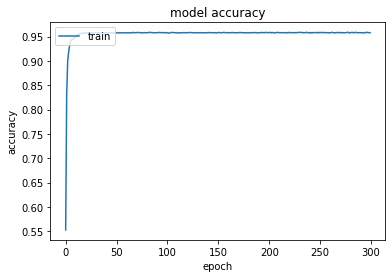

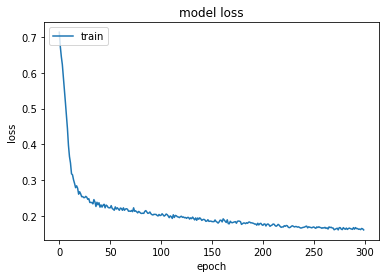

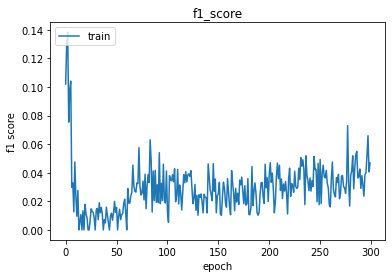

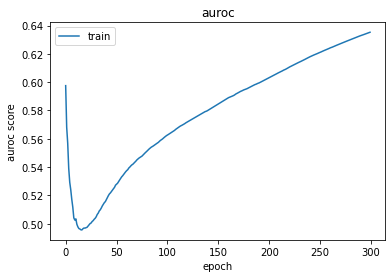

In [ ]:
# # see the final accuracy of the model
# _, accuracy = model.evaluate(x_training, y_training)
# print('Accuracy: %.2f' % (accuracy*100))


# should write out the history of the model's performance
print(history.history.keys())
wordKeys = list(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[wordKeys[2]])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history[wordKeys[0]])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#history for f1_score
plt.plot(history.history[wordKeys[1]])
plt.title('f1_score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#history for auc
plt.plot(history.history[wordKeys[3]])
# plt.plot([0, 1, 2, 3])
plt.title('auroc')
plt.ylabel('auroc score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [ ]:
print(len(y_training))

countPotholePos = 0
countPotholeNeg = 0
for indexForPotCount in range(7100):
  if y_training[indexForPotCount][0] < 0.5:
    countPotholeNeg = countPotholeNeg + 1
  else:
    countPotholePos = countPotholePos + 1
print('number of negative potholes is', countPotholeNeg)
print('number of positive potholes is', countPotholePos)
print('Percentage of potholes data that are have a pothole', (countPotholePos)/(countPotholeNeg + countPotholePos) * 100)

7100
number of negative potholes is 6800
number of positive potholes is 300
Percentage of potholes data that are have a pothole 4.225352112676056


In [ ]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-1.07864833e+00,  4.35198784e-01,  9.64271128e-02,
         2.61202902e-01,  4.41375464e-01,  1.31552100e-01,
         2.34296530e-01, -8.11897144e-02, -5.33082969e-02,
         3.54364097e-01,  3.48648101e-01,  2.22226799e-01],
       [-9.25862864e-02, -1.60014123e-01, -6.31624949e-04,
         1.55099511e-01,  1.01676010e-01, -3.23546112e-01,
         1.87168643e-01, -4.96340960e-01,  6.38970792e-01,
        -4.07877266e-02,  1.14580303e-01,  1.53669477e-01],
       [ 3.02430809e-01,  9.21969786e-02, -2.95061558e-01,
         2.00607046e-01, -1.02362089e-01,  2.09087014e-01,
        -2.15693459e-01,  5.78590512e-01,  2.28288755e-01,
        -2.79330492e-01, -6.64319396e-02,  2.31515437e-01],
       [-1.25572193e+00, -3.99984747e-01, -1.53843760e-01,
        -1.05282649e-01, -2.90705740e-01, -1.95381656e-01,
         1.40531409e+00,  1.85313495e-03,  9.88968536e-02,
        -2.59743303e-01, -1.77920714e-01, -5.97849041e-02],
       [-3.07526439e-01, -1.31892949e-01, -2.085861

In [ ]:
from keras.losses import binary_crossentropy, categorical_crossentropy
import keras.backend as K
import numpy as np
from prettytable import PrettyTable
from prettytable import ALL
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)


# define the NEW DL model
modelF = Sequential()
modelF.add(Dense(12, input_dim=8, activation='relu'))
modelF.add(Dropout(0.4))
modelF.add(Dense(12, activation='relu'))
modelF.add(Dropout(0.4))
modelF.add(Dense(8, activation='relu'))
modelF.add(Dropout(0.4))
modelF.add(Dense(1, activation='sigmoid'))
x_training=np.array(x_training)
y_training=np.array(y_training)

# compile the DL model
modelF.compile(loss=f1_loss, optimizer='adam', metrics=[f1, 'accuracy', tf.keras.metrics.AUC()]) #adam optimizer, binary crossentropy (classification) for loss function

# fit the keras model on the dataset
modelF.fit(x_training, y_training, epochs=1000, batch_size=1024, callbacks=[history])


Streaming output truncated to the last 5000 lines.
7100/7100 [==============================] - 0s 7us/step - loss: 0.6735 - f1: 0.3266 - accuracy: 0.9249 - auc_10: 0.7107
Epoch 2502/5000
7100/7100 [==============================] - 0s 8us/step - loss: 0.6482 - f1: 0.3544 - accuracy: 0.9265 - auc_10: 0.7107
Epoch 2503/5000
7100/7100 [==============================] - 0s 8us/step - loss: 0.6663 - f1: 0.3359 - accuracy: 0.9277 - auc_10: 0.7107
Epoch 2504/5000
7100/7100 [==============================] - 0s 8us/step - loss: 0.6668 - f1: 0.3321 - accuracy: 0.9275 - auc_10: 0.7107
Epoch 2505/5000
7100/7100 [==============================] - 0s 9us/step - loss: 0.6772 - f1: 0.3214 - accuracy: 0.9252 - auc_10: 0.7107
Epoch 2506/5000
7100/7100 [==============================] - 0s 9us/step - loss: 0.6567 - f1: 0.3444 - accuracy: 0.9268 - auc_10: 0.7106
Epoch 2507/5000
7100/7100 [==============================] - 0s 8us/step - loss: 0.6396 - f1: 0.3625 - accuracy: 0.9303 - auc_10: 0.7106
Epoch 

dict_keys(['loss', 'f1', 'accuracy', 'auc_10'])


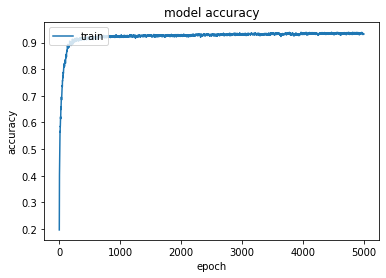

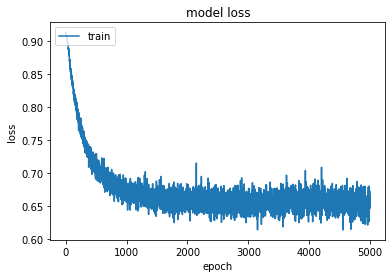

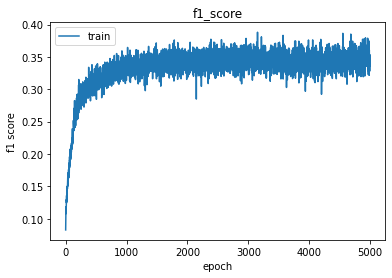

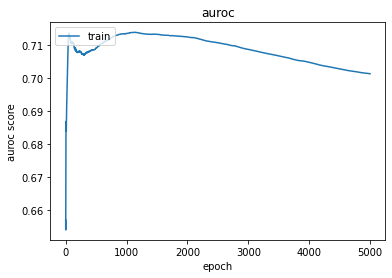

In [ ]:
# # see the final accuracy of the model
# _, accuracy = model.evaluate(x_training, y_training)
# print('Accuracy: %.2f' % (accuracy*100))

# should write out the history of the model's performance
print(history.history.keys())
wordKeys = list(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[wordKeys[2]])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history[wordKeys[0]])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#history for f1_score
plt.plot(history.history[wordKeys[1]])
plt.title('f1_score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#history for auc
plt.plot(history.history[wordKeys[3]])
# plt.plot([0, 1, 2, 3])
plt.title('auroc')
plt.ylabel('auroc score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
#NOW TRYING THIS WITH OVERSAMPLING THE DATA
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(x_trainingPandas, y_trainingPandas)

print(len(y_res))
print(len(x_res))

countPotholePos = 0
countPotholeNeg = 0
for indexForPotCount in range(len(y_res)):
  if y_res[indexForPotCount] < 0.5:
    countPotholeNeg = countPotholeNeg + 1
  else:
    countPotholePos = countPotholePos + 1
print('number of negative potholes is', countPotholeNeg)
print('number of positive potholes is', countPotholePos)
print('Percentage of potholes data that are have a pothole', (countPotholePos)/(countPotholeNeg + countPotholePos) * 100)

13600
13600
number of negative potholes is 6800
number of positive potholes is 6800
Percentage of potholes data that are have a pothole 50.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# define the NEW DL model
modelSample = Sequential()
modelSample.add(Dense(12, input_dim=8, activation='relu'))
modelSample.add(Dropout(0.4))
modelSample.add(Dense(12, activation='relu'))
modelSample.add(Dropout(0.4))
modelSample.add(Dense(8, activation='relu'))
modelSample.add(Dropout(0.4))
modelSample.add(Dense(1, activation='sigmoid'))

# compile the DL model
modelSample.compile(loss=f1_loss, optimizer='adam', metrics=[f1, 'accuracy', tf.keras.metrics.AUC()]) #adam optimizer, binary crossentropy (classification) for loss function

# fit the keras model on the dataset
modelSample.fit(x_res, y_res, epochs=1000, batch_size=1024, callbacks=[history])

Epoch 1/1000
13600/13600 [==============================] - 0s 31us/step - loss: 0.4890 - f1: 0.6053 - accuracy: 0.4834 - auc_12: 0.5502
Epoch 2/1000
13600/13600 [==============================] - 0s 9us/step - loss: 0.4770 - f1: 0.6387 - accuracy: 0.4801 - auc_12: 0.5531
Epoch 3/1000
13600/13600 [==============================] - 0s 7us/step - loss: 0.4613 - f1: 0.6506 - accuracy: 0.4913 - auc_12: 0.5531
Epoch 4/1000
13600/13600 [==============================] - 0s 7us/step - loss: 0.4452 - f1: 0.6586 - accuracy: 0.4941 - auc_12: 0.5506
Epoch 5/1000
13600/13600 [==============================] - 0s 8us/step - loss: 0.4257 - f1: 0.6614 - accuracy: 0.4969 - auc_12: 0.5484
Epoch 6/1000
13600/13600 [==============================] - 0s 8us/step - loss: 0.4059 - f1: 0.6664 - accuracy: 0.4977 - auc_12: 0.5443
Epoch 7/1000
13600/13600 [==============================] - 0s 8us/step - loss: 0.3854 - f1: 0.6663 - accuracy: 0.4989 - auc_12: 0.5426
Epoch 8/1000
13600/13600 [=====================

dict_keys(['loss', 'f1', 'accuracy', 'auc_12'])


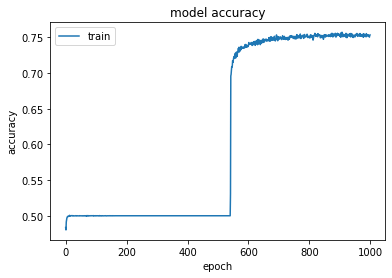

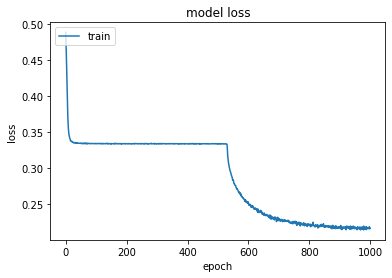

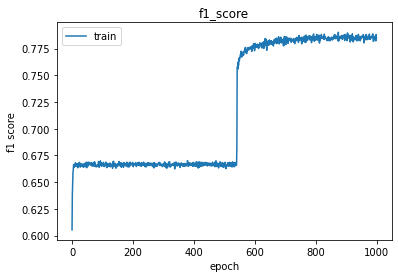

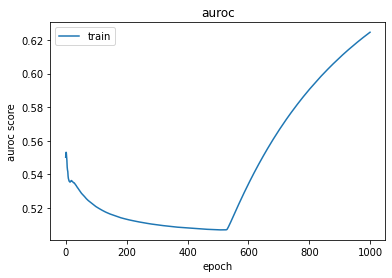

In [ ]:
# should write out the history of the model's performance
print(history.history.keys())
wordKeys = list(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[wordKeys[2]])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history[wordKeys[0]])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#history for f1_score
plt.plot(history.history[wordKeys[1]])
plt.title('f1_score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#history for auc
plt.plot(history.history[wordKeys[3]])
# plt.plot([0, 1, 2, 3])
plt.title('auroc')
plt.ylabel('auroc score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# define the NEW DL model
modelAccuracy = Sequential()
modelAccuracy.add(Dense(12, input_dim=8, activation='relu'))
modelAccuracy.add(Dropout(0.4))
modelAccuracy.add(Dense(12, activation='relu'))
modelAccuracy.add(Dropout(0.4))
modelAccuracy.add(Dense(12, activation='relu'))
modelAccuracy.add(Dropout(0.4))
modelAccuracy.add(Dense(8, activation='relu'))
modelAccuracy.add(Dropout(0.4))
modelAccuracy.add(Dense(4, activation='relu'))
modelAccuracy.add(Dropout(0.4))
modelAccuracy.add(Dense(1, activation='sigmoid'))

# compile the DL model
modelAccuracy.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1, 'accuracy', tf.keras.metrics.AUC()]) #adam optimizer, binary crossentropy (classification) for loss function

# fit the keras model on the dataset
modelAccuracy.fit(x_res, y_res, epochs=400, batch_size=128, callbacks=[history])

Epoch 1/400
13600/13600 [==============================] - 1s 45us/step - loss: 0.6937 - f1: 0.5017 - accuracy: 0.5004 - auc_16: 0.4869
Epoch 2/400
13600/13600 [==============================] - 0s 20us/step - loss: 0.6903 - f1: 0.5114 - accuracy: 0.5257 - auc_16: 0.5220
Epoch 3/400
13600/13600 [==============================] - 0s 19us/step - loss: 0.6853 - f1: 0.5551 - accuracy: 0.5343 - auc_16: 0.5359
Epoch 4/400
13600/13600 [==============================] - 0s 18us/step - loss: 0.6760 - f1: 0.5836 - accuracy: 0.5497 - auc_16: 0.5465
Epoch 5/400
13600/13600 [==============================] - 0s 19us/step - loss: 0.6674 - f1: 0.5979 - accuracy: 0.5645 - auc_16: 0.5602
Epoch 6/400
13600/13600 [==============================] - 0s 19us/step - loss: 0.6624 - f1: 0.5901 - accuracy: 0.5836 - auc_16: 0.5732
Epoch 7/400
13600/13600 [==============================] - 0s 18us/step - loss: 0.6522 - f1: 0.5641 - accuracy: 0.6182 - auc_16: 0.5867
Epoch 8/400
13600/13600 [=======================

dict_keys(['loss', 'f1', 'accuracy', 'auc_16'])


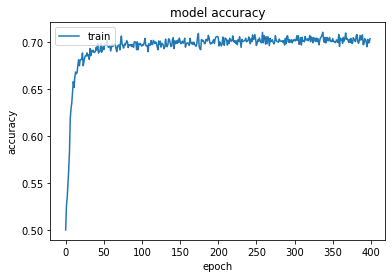

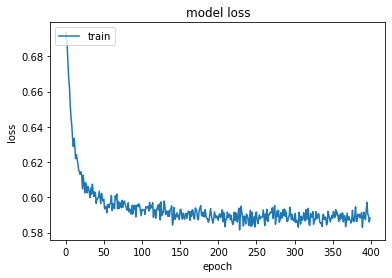

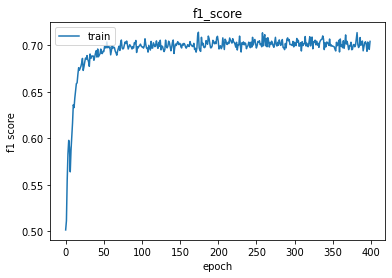

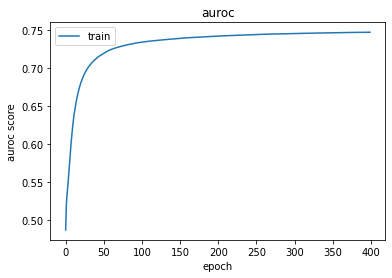

In [ ]:
# should write out the history of the model's performance
print(history.history.keys())
wordKeys = list(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[wordKeys[2]])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history[wordKeys[0]])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#history for f1_score
plt.plot(history.history[wordKeys[1]])
plt.title('f1_score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#history for auc
plt.plot(history.history[wordKeys[3]])
# plt.plot([0, 1, 2, 3])
plt.title('auroc')
plt.ylabel('auroc score')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#TO-DO (note for myself):
# 1. Split up data for training and validation
# 2. Compute F1 Scores
# 3. Research about how to deal with skewed data more effectively